In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from math import sqrt
from numpy import linalg as LA

# Лабораторная работа №1

## Utils

### Полезные ссылки:
- [описание лабы](http://mathdep.ifmo.ru/wp-content/uploads/2021/02/lab_1_optimization.pdf)

####  Методы одномерного поиска
- [теория 1 таски](http://mathdep.ifmo.ru/wp-content/uploads/2020/09/lec_1_optimization.pdf)
- [+ 1 таске](http://machinelearning.ru/wiki/index.php?title=Метод_золотого_сечения._Симметричные_методы)

#### Градиентный спуск
- [градиентный спуск](http://fourier.eng.hmc.edu/e176/lectures/ch3/node7.html)
- [еще один такой](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%81%D0%BF%D1%83%D1%81%D0%BA%D0%B0)
- [и тут еще](http://www.apmath.spbu.ru/ru/staff/abbasov_m_e/files/MO1.pdf)
- [линейный поиск](http://fourier.eng.hmc.edu/e176/lectures/ch3/node8.html)

#### Градиентный спуск для квадратичных функций
- [симметричные матрицы и квадратичные формы](http://math.ucdenver.edu/~esulliva/LinearAlgebra/SlideShows/07_02.pdf)

### Test data

In [2]:
funcs = [ 
    lambda x: x**2,
    lambda x: 3*x + 2*x**2, 
    lambda x: 1 + 5*x + 3*x**3
]

dfs = [
    lambda x: 2*x,
    lambda x: 3 + 4*x, 
    lambda x: 5 + 9*x**2
]

a = -10
b = 5
aa = [-50, -20, -5]
bb = [20, 10, 5]
eps = [1e-3, 1e-4, 1e-6]

matrices = [
    np.array([[3,-1],[-1,5]]),
    np.array([[4,0],[0,3]]),
    np.array([[5,2],[2,3]])
]

xs_start = [
    np.array([[1.],[2.]]),
    np.array([[3.],[2.]])
]

colors = ['red', 'green', 'blue']

### Minor utils functions

In [3]:
def get_function_from_symmetric_matrix(Q):
    # [[4, 1], [1, 3]]  == 4x1^2 + 2x1x2 + 3x2^2
    
    return lambda x, y: (x**2)*Q[0][0] + 2*x*y*Q[0][1] + (y**2)*Q[1][1]

### For visualization

In [4]:
def print_iter(n_iter, a, b):
    print(str(n_iter) + ': ' + '[' + str(a) + ', ' + str(b) + ']')

In [5]:
def print_res(res, iters, func_iters):
    print('Result:', res)
    print('Total iterations: ', iters)
    print('Total function computations: ', func_iters)

In [6]:
def print_grad_res(res, step, grad_xs, c):
    print('Result:', res)
    print('Total gradient descent iterations: ', step)
    print('Gradient descent steps: ', grad_xs)
    print('Condition number: ', c)

In [7]:
def draw_countors_plot_with_gradient_steps(Q, grad_coords):
    x_min = -10
    y_min = -10
    x_max = 10
    y_max = 10
    delta = 20
    
    
    x = np.linspace(x_min, x_max, delta)
    y = np.linspace(y_min, y_max, delta)

    X, Y = np.meshgrid(x, y)
    z = get_function_from_symmetric_matrix(Q) 
    Z = z(X, Y)

    contours = plt.contour(X, Y, Z, 3, colors='black')
    plt.clabel(contours, inline=True, fontsize=12)
    plt.imshow(Z, extent=[x_min, x_max, y_min, y_max], origin='lower',
               cmap='RdGy')
    plt.colorbar();

    plt.plot(grad_coords, color='black')
    plt.show()

## Методы одномерного поиска

$a < x_1 < x_2 < b$, \
$f$ — унимодальная
- если $f(x_1) < f(x_2)$, то минимум на отрезке $[a, x_2]$
- если $f(x_1) > f(x_2)$, то минимум на отрезке $[x_1, b]$
- если $f(x_1) == f(x_2)$, то минимум на отрезке $[x_1, x_2]$

In [8]:
def get_value(fdict, f, x: float):
    if (x not in fdict):
        v = f(x)
        fdict[x] = v
    else:
        v = fdict[x]
    
    return v, fdict

In [9]:
def get_next_interval_base(fdict, f, a: float, b: float, x1: float, x2: float):
    v1, fdict = get_value(fdict, f, x1)
    v2, fdict = get_value(fdict, f, x2)
    
    if (v1 < v2):
        return fdict, a, x2
    elif (v1 > v2):
        return fdict, x1, b
    else:
        return fdict, x1, x2

### Метод дихотомии 
- дихотомия — деление отрезка на 2 части
- сходимость метода всегда равна сходимости в наихудшем случае.

In [10]:
def bisection_search(f, a, b, verbose=False, eps=1e-3):
    fdict = {}
    step = 0
    delta = eps/4
    
    if (verbose):
        print_iter(step, a, b)
        
    while (abs(a - b) > eps):
        x1 = ((a + b) / 2) - delta
        x2 = ((a + b) / 2) + delta
        fdict, a, b = get_next_interval_base(fdict, f, a, b, x1, x2)
        step += 1
        if (verbose):
            print_iter(step, a, b)
       
    return (a+b)/2, step, len(fdict)

In [11]:
res, iters, func_iters = bisection_search(funcs[0], a, b)

print_res(res, iters, func_iters)

Result: -7.041931152195852e-06
Total iterations:  15
Total function computations:  30


### Метод золотого сечения
- если был интервал $x_2 \in (x_1, x_3)$, то мы хотим поместить новую точку $x_4$ внутри интервала симметрично относительно $x_2$
- золотое сечение: $\frac{b - a}{b - x_1} = \frac{x_2 - a}{x_1 - a} =  \frac{b - x_1}{b - x_2} = \frac{b - x_1}{x_1 - a} = \frac{1+\sqrt5}{2}$
- $\frac{b - a}{x_1 - a} = \frac{1+\sqrt5}{2}$ 
- $\frac{b - a}{b - x_2} = \frac{1+\sqrt5}{2}$ 
- если первернуть, будет: $\frac{-1+\sqrt5}{2}$
- $x_1$ -  точка золотого сечения отрезка $[a, x_2]$
- $x_2$ -  точка золотого сечения отрезка $[x_1, b]$
- [метод золотого сечения](http://fourier.eng.hmc.edu/e176/lectures/ch3/node3.html)

In [12]:
def golden_section_search(f, a, b, verbose=False, eps=1e-3):
    fdict = {}
    step = 0
    gold = (1+sqrt(5))/2
    
    if (verbose):
        print_iter(step, a, b)
    delta = (b-a)/gold
    x1 = b - delta
    x2 = a + delta
    
    while (abs(a - b) > eps):
        fdict, a, b = get_next_interval_base(fdict, f, a, b, x1, x2)
        delta = (b-a)/gold
        if (a == x1):
            x1 = x2
            x2 = a + delta
        else:
            x2 = x1
            x1 = b - delta
        step += 1
        if (verbose):
            print_iter(step, a, b)

    return (a+b)/2, step, len(fdict)

In [13]:
res, iters, func_iters = golden_section_search(funcs[0], a, b)

print_res(res, iters, func_iters)

Result: 0.00016526740337958101
Total iterations:  20
Total function computations:  21


### Метод Фибоначчи

- то же, что и в золотом сечение, только коэффициенты другие
- [метод фибоначчи](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%A4%D0%B8%D0%B1%D0%BE%D0%BD%D0%B0%D1%87%D1%87%D0%B8)
- $F_n = \frac{1}{\sqrt5}((\frac{1+\sqrt5}{2})^n - (\frac{1-\sqrt5}{2})^n), n = 1, 2, ..$
- $\frac{b-a}{\epsilon} < F_{n+2}$
- $n$ — кол-во вычислений фунции

In [14]:
def fib(n):
    return 1/sqrt(5) * (((1+sqrt(5))/2)**n - ((1-sqrt(5))/2)**n)

In [15]:
def fib_search(f, a, b, verbose=False, eps=1e-3):
    fdict = {}
    
    n = 0
    while (fib(n+2) <= (b-a)/eps):
        n += 1
    
    if (verbose):
        print_iter(0, a, b)
    x1 = a + fib(n)*(b-a)/fib(n+2)
    x2 = a + fib(n+1)*(b-a)/fib(n+2)
    step = 1
    
    while (abs(a - b) > eps and step <= n-2):
        fdict, a, b = get_next_interval_base(fdict, f, a, b, x1, x2)
        if (a == x1):
            x1 = x2
            x2 = a + fib(n-step+2)*(b-a)/fib(n-step+3)
        else:
            x2 = x1
            x1 = a + fib(n-step+1)*(b-a)/fib(n-step+3)
        if (verbose):
            print_iter(step, a, b)
        step += 1
        
    print()
    return (a+b)/2, step-1, len(fdict)

In [16]:
res, iters, func_iters = fib_search(funcs[2], a, b)

print_res(res, iters, func_iters)


Result: -9.998691419206247
Total iterations:  18
Total function computations:  19


### Statistics

In [17]:
methods = {'bisection_search': bisection_search, 
           'golden_section_search': golden_section_search, 
           'fib_search': fib_search}

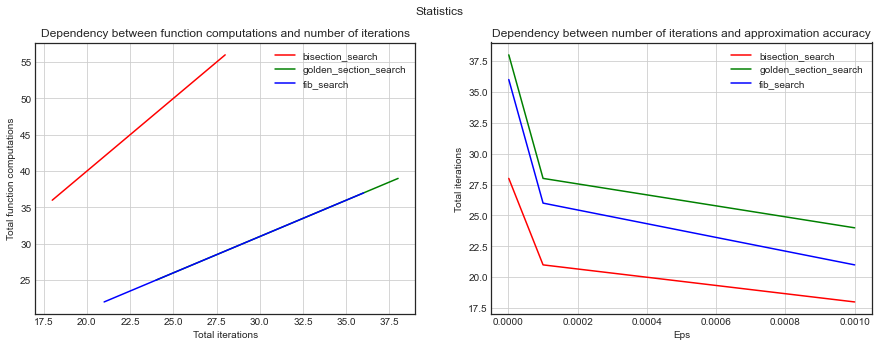

In [18]:
all_iters = {}
all_func_comps = {}

f = funcs[2]
for name, m in methods.items():
    all_iters[name] = []
    all_func_comps[name] = []
    for e in eps:
        res, iters, func_comps = m(f, aa[0], bb[0], False, e)
        all_iters[name].append(iters)
        all_func_comps[name].append(func_comps)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Statistics')
fig.set_figheight(5)
fig.set_figwidth(15)

i = 0
for name in methods.keys():
    ax1.plot(all_iters[name], all_func_comps[name], color = colors[i])
    i += 1
ax1.legend(methods.keys())
ax1.set_title('Dependency between function computations and number of iterations')
ax1.set_xlabel('Total iterations')
ax1.set_ylabel('Total function computations')
ax1.grid(True)
# ax1.show()

i = 0
for name in methods.keys():
    ax2.plot(eps, all_iters[name], color = colors[i])
    i += 1
ax2.legend(methods.keys())
ax2.set_title('Dependency between number of iterations and approximation accuracy')
ax2.set_xlabel('Eps')
ax2.set_ylabel('Total iterations')
ax2.grid(True)
plt.show()

## Метод градиентного спуска

- если гладкая функция $f(x)$ ограничена снизу, ее градиент $f'(x)$ удовлетворяет условию Липшица, то тогда при выбранных с помощью МНСК $\lambda_k$: $||f'(x^k)|| \to 0$ при $k \to inf$

### Градиентный спуск для одномерных функций

In [19]:
def gradient_descent(f, df, optimizer, x, eps):
    step = 0
    fcomps = 0
    niters = 0
    while (abs(df(x)) > eps):
        phi = lambda lr: f(x - lr*df(x))
        optimal_lr, iters, fcomp = optimizer(phi, 0, 1, True, eps)
        x -= optimal_lr * df(x)
        step += 1
        fcomps += fcomp
        niters += iters
        
    return x, niters, fcomps, step

In [20]:
res, iters, func_comps, grad_steps = gradient_descent(funcs[0], dfs[0], fib_search, 10, 0.01)

print_res(res, iters, func_comps)
print('Gradient descent steps:', grad_steps)

0: [0, 1]
1: [0.3819444444444444, 1]
2: [0.3819444444444444, 0.7639371141975309]
3: [0.3819444444444444, 0.6180555555555555]
4: [0.4720959595959595, 0.6180555555555555]
5: [0.4720959595959595, 0.5622474747474746]
6: [0.4720959595959595, 0.5278742283950617]
7: [0.4935491399033065, 0.5278742283950617]
8: [0.4935491399033065, 0.5150023202106535]

0: [0, 1]
1: [0.3819444444444444, 1]
2: [0.3819444444444444, 0.7639371141975309]
3: [0.3819444444444444, 0.6180555555555555]
4: [0.4720959595959595, 0.6180555555555555]
5: [0.4720959595959595, 0.5622474747474746]
6: [0.4720959595959595, 0.5278742283950617]
7: [0.4935491399033065, 0.5278742283950617]
8: [0.4935491399033065, 0.5150023202106535]

Result: 0.0007312747008064863
Total iterations:  16
Total function computations:  18
Gradient descent steps: 2


### Градиентный спуск для квадратичной функции 

- $F(z) = \frac{1}{2}(Qz, z) + (c, z)$
- Q -- симметричная матрица порядка $n$
- c -- заданный вектор
- $grad f(x) = Qx$

In [21]:
def get_eigenvalues(Q: np.ndarray):
    return LA.eigvals(Q)

In [22]:
def get_condition_num(Q):
    eigs = get_eigenvalues(Q)
    min_eig = min(eigs)
    max_eig = max(eigs)
    c = max_eig/min_eig
    return c

#### С оптимальным learning rate

In [23]:
def quadratic_gradient_descent_optimal(Q: np.ndarray, x, eps):
    step = 0
    xs = []
    c = get_condition_num(Q)
    
    while (np.linalg.norm(Q * x) > eps):
        optimal_lr = (c - 1)/(c + 1)
        diff = np.linalg.norm(np.eye(len(Q)) - optimal_lr*Q)*x
        x -= diff
        xs.append(list(x))
        step += 1
        
    return x, step, xs, c

In [24]:
res, steps, grad_coords, cond = quadratic_gradient_descent_optimal(matrices[0], np.array([1., 2.]), 0.1)

print_grad_res(res, steps, grad_coords, cond)

Result: [0.00668638 0.01337277]
Total gradient descent iterations:  2
Gradient descent steps:  [[0.08177031712777905, 0.1635406342555581], [0.0066863847631775525, 0.013372769526355105]]
Condition number:  2.0938363213560542


#### С константным lr

In [25]:
def quadratic_gradient_descent_constant(Q: np.ndarray, x, lr, eps):
    step = 0
    xs = []
    c = get_condition_num(Q)
    
    while (np.linalg.norm(Q * x) > eps):
        diff = np.linalg.norm(np.eye(len(Q)) - lr*Q)*x
        x -= diff
        xs.append(list(x))
        step += 1
        
    return x, step, xs, c

In [26]:
res, steps, grad_coords, cond = quadratic_gradient_descent_constant(matrices[0], np.array([1.,2.]), 0.5, 0.1)

print_grad_res(res, steps, grad_coords, cond)

Result: [-0.0092922  -0.01858439]
Total gradient descent iterations:  15
Gradient descent steps:  [[-0.7320508075688772, -1.4641016151377544], [0.5358983848622452, 1.0717967697244903], [-0.3923048454132635, -0.784609690826527], [0.287187078897963, 0.574374157795926], [-0.21023553303060066, -0.4204710660612013], [0.15390309173472455, 0.3078061834694491], [-0.11266488259175211, -0.22532976518350423], [0.08247641828594487, 0.16495283657188975], [-0.06037692861161445, -0.1207538572232289], [0.04419897934866081, 0.08839795869732162], [-0.03235589852590727, -0.06471179705181454], [0.02368616164550706, 0.04737232329101412], [-0.01733947376080041, -0.03467894752160082], [0.012693375769413297, 0.025386751538826594], [-0.009292195982774223, -0.018584391965548445]]
Condition number:  2.0938363213560542


#### С вычислением оптимального на каждом шаге

In [27]:
def quadratic_gradient_descent_with_optimizer(Q: np.ndarray, x, optimizer, eps):
    step = 0
    
    eigs = get_eigenvalues(Q)
    min_eig = min(eigs)
    max_eig = max(eigs)
    c = max_eig/min_eig
    
    grad_xs = [x]
    
    while (np.linalg.norm(Q @ x) > eps):
        phi = lambda lr: np.linalg.norm(np.eye(len(Q)) - lr*Q)
#         optimal_lr, iters, fcomp = optimizer(phi, 0, 2/max_eig, True, eps)
        optimal_lr, iters, fcomp = optimizer(phi, 0.1, 5, True, eps)
        x -= phi(optimal_lr)*x
        step += 1
        grad_xs.append(list(x))
        
    return x, step, grad_xs, c

In [28]:
res, steps, grad_coords, cond = quadratic_gradient_descent_with_optimizer(matrices[0], np.array([1., 2.]), fib_search, 0.1)

print_grad_res(res, steps, grad_coords, cond)

0: [0.1, 5]
1: [0.1, 3.1290909090909094]
2: [0.1, 1.970909090909091]
3: [0.1, 1.2565619834710744]
4: [0.1, 0.8153475935828876]
5: [0.1, 0.5405950413223141]
6: [0.1, 0.3751336898395722]

0: [0.1, 5]
1: [0.1, 3.1290909090909094]
2: [0.1, 1.970909090909091]
3: [0.1, 1.2565619834710744]
4: [0.1, 0.8153475935828876]
5: [0.1, 0.5405950413223141]
6: [0.1, 0.3751336898395722]

0: [0.1, 5]
1: [0.1, 3.1290909090909094]
2: [0.1, 1.970909090909091]
3: [0.1, 1.2565619834710744]
4: [0.1, 0.8153475935828876]
5: [0.1, 0.5405950413223141]
6: [0.1, 0.3751336898395722]

0: [0.1, 5]
1: [0.1, 3.1290909090909094]
2: [0.1, 1.970909090909091]
3: [0.1, 1.2565619834710744]
4: [0.1, 0.8153475935828876]
5: [0.1, 0.5405950413223141]
6: [0.1, 0.3751336898395722]

0: [0.1, 5]
1: [0.1, 3.1290909090909094]
2: [0.1, 1.970909090909091]
3: [0.1, 1.2565619834710744]
4: [0.1, 0.8153475935828876]
5: [0.1, 0.5405950413223141]
6: [0.1, 0.3751336898395722]

0: [0.1, 5]
1: [0.1, 3.1290909090909094]
2: [0.1, 1.970909090909091]
3

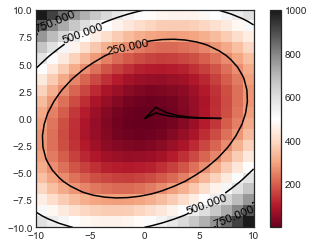

In [29]:
draw_countors_plot_with_gradient_steps(matrices[0], grad_coords)